<a href="https://colab.research.google.com/github/lonestarchaser/SED/blob/main/SED_Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SED Movie

I work in cgs units (centimeters-grams-seconds) which makes no sense for people who study things at the scale of the Universe, but that is how I was trained in grad school, so there you go.  In cgs units, those constants are :
$$    h = 6.6260755 \times 10^{-27} \mathrm{erg} \cdot \mathrm{s} $$
$$    c = 2.997924 \times 10^{10} \mathrm{cm/s} $$
$$    k = 1.380658 \times 10^{-16} \mathrm{erg/K}$$


The grid of effective temperatures and spectral types comes from I think the big Lang reference book but now I'm not sure (it's not written in my code, shame on me):

    teff = [  2640,  2940,  3050,  3240,  3370,  3470,  3580,  3720,  3850,  4060,
              4350,  4590,  4730,  4900,  5080,  5250,  5570,  5770,  5860,  6030,
              6200,  6440,  6890,  7200,  7580,  7850,  8200,  8720,  8970,  9230,
              9520, 10500, 11900, 13000, 14000, 15400, 18700, 22000, 25400, 30000,
             33000, 35800, 38000, 41000, 44500, 48000, 52500]

    types = ['m8', 'm7', 'm6', 'm5', 'm4', 'm3', 'm2', 'm1', 'm0', 'k7',
             'k5', 'k4', 'k3', 'k2', 'k1', 'k0', 'g8', 'g5', 'g2', 'g0',
             'f8', 'f5', 'f2', 'f0', 'a8', 'a7', 'a5', 'a3', 'a2', 'a1',
             'a0', 'b9', 'b8', 'b7', 'b6', 'b5', 'b3', 'b2', 'b1', 'b0',
             'o9', 'o8', 'o7', 'o6', 'o5', 'o4', 'o3']


In my IDL code, I make an array of wavelengths in microns to plot on the x-axis, but then immediately convert them to cm so that I can use them in the calculation. (watch your units!)
$$\lambda = \lambda * 10^{-4} \mathrm{cm} $$
$$ B_{\lambda} = \frac{2hc^2/ \lambda^5}{e^{hc/\lambda k T}-1} $$

Let's check units:

$$B_{\lambda} = \frac{ ( \mathrm{erg} \cdot \mathrm{s} \cdot ({\mathrm{cm/s}})^2 ) / \mathrm{cm}^5} { e^{(\mathrm{erg} \cdot \mathrm{s} \cdot {\mathrm{cm/s}}) / (\mathrm{cm} \cdot \mathrm{erg/K} \cdot{K})   } }$$

$$B_{\lambda} = \frac{ ( \mathrm{erg} \cdot \mathrm{s} \cdot \mathrm{cm}^2 ) / ( \mathrm{s}^2 \cdot \mathrm{cm}^5 )} { e^{(\mathrm{erg} \cdot {\mathrm{cm}}) / (\mathrm{cm} \cdot \mathrm{erg} )   } }$$

$$B_{\lambda} = \frac{ \mathrm{erg} / (\mathrm{s} \cdot \mathrm{cm}^3 )  } { e^{\mathrm{unitless}} }$$

So the units on $B_{\lambda}$ are $\frac{ \mathrm{erg} } { \mathrm{s} \cdot \mathrm{cm}^3 }$.

Then what you want to plot is actually $\lambda \cdot B_{\lambda}$ (because you want energy density, and that equation was just $B_{\lambda}$).

Well, more specifically, you want to plot the logarithm of that, against the logarithm of the wavelength in microns (note i'm converting it back from cm here to $\mu$m).

    plot, alog10(lambda*1d4), alog10(blambda)

Let's check units one more time:

So the units on $B_{\lambda} \cdot \lambda$ are $\frac{ \mathrm{erg} } { \mathrm{s} \cdot \mathrm{cm}^3 } \cdot \mathrm{cm}$, or just  $\frac{ \mathrm{erg} } { \mathrm{s} \cdot \mathrm{cm}^2 }$, which makes sense as an energy density.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

h = 6.6260755e-27    # erg seconds
c = 2.997924e10      # cm/s
k = 1.380658e-16     # erg/K

#  Teff is in Kelvin
Teff =  [2640,2940,3050,3240,3370,3470,3580,3720,3850,4060, 4350,4590,4730,4900,5080,5250,5570,5770,5860,6030, 6200,6440,6890,7200,7580,7850,8200,8720,8970,9230, 9520,10500,11900,13000,14000,15400,18700,22000,25400, 30000,33000,35800,38000,41000,44500,48000,52500]
Ttypes = ['M8','M7','M6','M5', 'M4', 'M3', 'M2', 'M1', 'M0', 'K7', 'K5', 'K4', 'K3', 'K2', 'K1', 'K0', 'G8', 'G5', 'G2', 'G0', 'F8', 'F5', 'F2', 'F0', 'A8', 'A7', 'A5', 'A3', 'A2', 'A1', 'A0', 'B9', 'B8', 'B7', 'B6', 'B5', 'B3', 'B2', 'B1', 'B0', 'O9', 'O8', 'O7', 'O6', 'O5', 'O4', 'O3']

lambdytoPlot = np.logspace(-3, 4, 1000) # in microns
lambdy = lambdytoPlot * 10**-4          # in cm

# We have to feed in a fake initial value so we can keep appending to it in the for loop
lambdyBigLambdy = np.zeros(np.size(lambdy))
legendText = np.array([''], dtype=object)


for index, T in np.ndenumerate(Teff):

  # The index value has some weird comma in it - I don't know why but this fixes it
  indexAsInt = int(index[0])

  Tlabel = Ttypes[indexAsInt]
  bigLambdy = (2*h*c**2 / lambdy**5) / (np.exp( (h*c) / (k * lambdy * T) ) - 1)     # ** is the equivalent of .^ in Matlab

  # This is what we actually want to plot
  lambdyBigLambdy = np.vstack([lambdyBigLambdy, bigLambdy * lambdy])

  legendText = np.vstack([legendText,'T = %6.0f (%s)' % (T, Tlabel)])


# Now let's get rid of that first garbage row
lambdyBigLambdy = np.delete(lambdyBigLambdy, (0), axis=0)
legendText = np.delete(legendText, (0), axis=0)

print('Data is ready to go!')


Data is ready to go!


<ipython-input-1-63d3c51af9cf>:27: RuntimeWarning: overflow encountered in exp
  bigLambdy = (2*h*c**2 / lambdy**5) / (np.exp( (h*c) / (k * lambdy * T) ) - 1)     # ** is the equivalent of .^ in Matlab


## Test the Graph Without Animation

The wavelengths I marked on the plot are a subset of all the wavelengths one COULD mark; a fairly complete list of wavelengths (and zero points) is here:
http://coolwiki.ipac.caltech.edu/index.php/Central_wavelengths_and_zero_points

The wavelengths I marked with vertical lines in my plots are(all in microns)

* 0.44 (B band)
* 0.55 (V band)
* 3.6 (irac-1)
* 5.8 (irac-3)
* 8 (irac-4)
* 24 (mips-1)
* 160 (mips-3 but also pacs-red)
* 500 (spire-long).

The ones that I marked with text are U,B,V, Sloan r, Cousins I, J, H, Ks, irac-1,2,3,4, wise-3, mips-1, mips-2 (which is also pacs-blue), mips-3 (which is also pacs-red), spire-short, and spire-long (wavelengths, all in microns: 0.36, 0.44, 0.55, 0.624, 0.797, 1.25, 1.65, 2.16, 3.6, 4.5, 5.8, 8, 12, 24, 70, 160, 250, 500)


<ipython-input-2-4d5b2d5ff660>:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10**15)


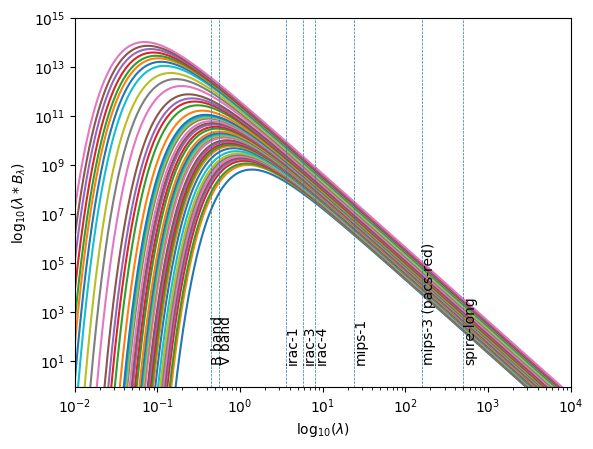

In [ ]:
## Now this is just the plotting part if you don't want animation:

# Convert x- and y--axis to Logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Set x- and y-axis limits and labels
plt.xlim(10**-2, 10**4)
plt.ylim(0,10**15)
plt.xlabel('$\mathrm{log}_{10}(λ)$')
plt.ylabel('$\mathrm{log}_{10}(λ * B_λ)$')

for indexAsInt in range(len(Teff)):      # Teff is the controlling dimension
  plt.plot(lambdytoPlot, lambdyBigLambdy[indexAsInt], label = legendText[indexAsInt])

wavelengthsOfNote =       [0.44,     0.55,     3.6,      5.8,      8,        24,       160,                 500]
wavelengthsOfNoteLabels = ['B band', 'V band', 'irac-1', 'irac-3', 'irac-4', 'mips-1', 'mips-3 (pacs-red)', 'spire-long']

for indexAsInt in range(len(wavelengthsOfNote)):
  plt.axvline(x = wavelengthsOfNote[indexAsInt], linestyle = '--', linewidth = 0.5)
  plt.text(wavelengthsOfNote[indexAsInt],10,wavelengthsOfNoteLabels[indexAsInt],rotation=90)

#plt.legend()


## Create the graph with animation

Once the graph is good, animate it one line at a time.

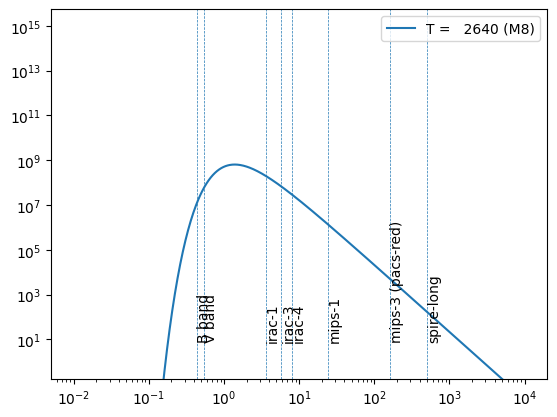

In [ ]:
'''
Once you have the data, this is how you make the animation.
'''

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation

matplotlib.rcParams['animation.embed_limit'] = 2**128

# This is to just establish that we're plotting so we have the "ax" variable
#   to use in the next line
fig, ax = plt.subplots(1,1);

# This plots the "base picture" with the limits we want for the axis
#   I think we have to have the comma after it because it's a list

xLimits = [10**-2, 10**4]
yLimits = [10**0,10**15]
plt.xscale('log')
plt.yscale('log')
listOLines, = ax.plot(xLimits,yLimits);

wavelengthsOfNote =       [0.44,     0.55,     3.6,      5.8,      8,        24,       160,                 500]
wavelengthsOfNoteLabels = ['B band', 'V band', 'irac-1', 'irac-3', 'irac-4', 'mips-1', 'mips-3 (pacs-red)', 'spire-long']


for indexAsInt in range(len(wavelengthsOfNote)):
  plt.axvline(x = wavelengthsOfNote[indexAsInt], linestyle = '--', linewidth = 0.5)
  plt.text(wavelengthsOfNote[indexAsInt],10,wavelengthsOfNoteLabels[indexAsInt],rotation=90)


# This is the animation code
def animate(i):
  listOLines.set_data(lambdytoPlot, lambdyBigLambdy[i]);
  label = legendText[i]
  ax.legend(label)


# This creates the animation where it just animates the first frames == xx
#    number of frames in the data.  Then you can do interval == whatever to make
#    it not animate every single frame.
# If you want the animation itself to go faster once it's rendered, just click
#    the + button under the picture.
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(Teff), interval = 10);

ani

# I don't know how to make that extra graph at the bottom go away.